<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Capstone Project <br> Notebook_5  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import statsmodels
import statsmodels.api as sm

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [2]:
df = pd.read_csv('data_eda_1.csv',index_col=0)
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,IncomeGroup_Low income,IncomeGroup_Medium income,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_Low,CreditRating_Medium,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Professional,New_maritalstatus_Yes
0,1,-1.089034,-0.422798,-1.125036,-0.044197,-0.995504,-0.621914,-0.566549,-0.450622,-0.889336,-0.306586,-0.568253,-0.824996,-0.604886,0.460593,-1.610162,-1.182049,0.012439,-0.218215,-0.899446,-0.068108,-0.150674,2.477643,1.165226,-0.581885,0.807270,1.119678,0.107745,1.172978,-0.940475,5.452813,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0
1,1,-1.556158,-1.937776,-1.450779,-0.912074,-0.995504,-0.621914,0.018886,0.088432,-1.200278,-1.216280,-1.013639,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.319026,-1.537118,-1.429573,-0.068108,-0.897074,2.388088,-0.760155,-0.581885,0.807270,-0.767089,3.053676,0.489551,1.056411,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,1,1
2,0,-0.420564,-1.998448,-0.272519,-0.912074,-0.995504,-0.621914,0.026624,0.088432,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.495143,-1.466096,-1.182049,-1.665568,-1.154741,-1.675080,-0.068108,-0.897074,2.448340,-0.760155,-0.581885,-0.850485,-0.767089,3.614747,-0.022125,0.852418,-0.183392,-0.132239,-0.221591,-0.192672,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1
3,0,0.826362,1.392611,1.180063,1.170112,-0.995504,-0.621914,0.655061,0.284291,2.228625,1.290204,1.349529,1.501970,1.946418,0.941048,2.908416,2.064116,2.505608,1.813093,2.044460,-0.068108,1.849625,2.418494,1.165226,1.348420,1.895246,1.700472,0.466880,0.132730,-0.940475,-0.183392,-0.132239,-0.221591,-0.192672,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,-1.544648,-2.469987,-1.450779,-0.912074,-0.995504,-0.621914,0.034384,0.083251,-1.515686,-1.216280,-1.760480,-0.824996,-0.604886,-1.600850,-1.610162,-1.182049,-1.898531,-1.807759,-1.675080,-0.068108,-0.897074,2.226882,1.165226,1.348420,1.594044,1.552675,1.628558,0.687544,1.160087,-0.183392,-0.132239,-0.221591,5.190155,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1


In [3]:
df.reset_index(inplace=True, drop=True)

### Split the dependent and independent variables

In [4]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

## Train-Test Split

Before applying various classification techniques to predict the Churn, let us split the dataset in train and test set.

In [5]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test ,y_train ,y_test = train_test_split(df_features,df_target, random_state=10, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',X_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',X_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 57)
y_train:  (35475,)
x_test:  (15204, 57)
y_test:  (15204,)


#### Create a generalized function to calculate the metrics for the test set.

In [6]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [7]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for train set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Plot the confusion matrix.

In [8]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Plot the ROC curve.

ROC curve is plotted with the true positive rate (tpr) on the y-axis and false positive rate (fpr) on the x-axis. The area under this curve is used as a measure of the separability of the model.

In [9]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve  Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

<a id="boosting"></a>
# 3. Boosting Methods

The Ensemble technique considers multiple models for predicting the results. `Bagging` and `Boosting` are two of the types of ensembles. The bagging methods construct the multiple models in parallel; whereas, the boosting methods construct the models sequentially.

Earlier, we have studied one of the bagging (bootstrap aggregating) technique i.e. `Random Forest`.

The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model. In this section, we learn some of the boosting methods such as `AdaBoost`, `Gradient Boosting` and `XGBoost`.

<a id="ada"></a>
## 3.1 AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

#### Build an Adaboost model on a training dataset.

In [10]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

Let us understand the parameters in the `AdaBoostClassifier()`:

`algorithm=SAMME.R`: It is the default boosting algorithm. This algorithm uses predicted class probabilities to build the stumps.

`base_estimator=None`: By default, the estimator is a decision tree with a maximum depth equal to 1 (stump).

`learning_rate=1.0`: It considers the contribution of each estimator in the classifier.

`n_estimators=40`: It is the number of estimators at which boosting is terminated.

`random_state=10`: It returns the same set of samples for each code implementation.

#### Plot the confusion matrix.

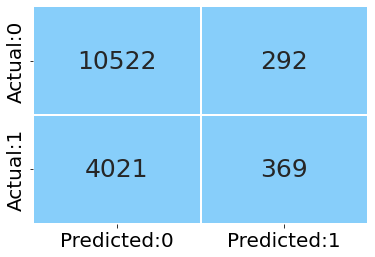

In [11]:
# call the function to plot the confusion matrix
# pass the AdaBoost model to the function
plot_confusion_matrix(ada_model)

**Calculate performance measures on the test set.**

In [12]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
train_report = get_train_report(ada_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.73      0.97      0.83     25362
           1       0.57      0.09      0.15     10113

    accuracy                           0.72     35475
   macro avg       0.65      0.53      0.49     35475
weighted avg       0.68      0.72      0.64     35475



In [13]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the AdaBoost model to the function
test_report = get_test_report(ada_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.72      0.97      0.83     10814
           1       0.56      0.08      0.15      4390

    accuracy                           0.72     15204
   macro avg       0.64      0.53      0.49     15204
weighted avg       0.68      0.72      0.63     15204



**Interpretation:** The output shows that the model is 71% accurate.

#### Plot the ROC curve.

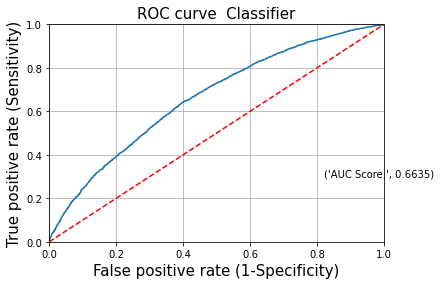

In [14]:
# call the function to plot the ROC curve
# pass the AdaBoost model to the function
plot_roc(ada_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the AdaBoost model is away from the dotted line; with the AUC score 0.6532.

<a id="gradient"></a>
## 3.2 Gradient Boosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

#### Build a gradient boosting model on a training dataset.

In [15]:
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

Let us understand the parameters in the `GradientBoostingClassifier()`:

`ccp_alpha=0.0`: The complexity parameter used for pruning. By default, there is no pruning.

`criterion=friedman_mse`: The criteria to measure the quality of a split.

`init=None`: The estimator for initial predictions.

`learning_rate=0.1`: It considers the contribution of each estimator in the classifier.

`loss=deviance`: The loss function to be optimized.

`max_depth=10`: Assigns the maximum depth of the tree.

`max_features=None`: Maximum features to consider for the split.

`max_leaf_nodes=None`: Maximum number of leaf/terminal nodes in the tree.

`min_impurity_decrease=0.0`: A node splits if it decreases the impurity by the value given by this parameter. 

`min_impurity_split=None`: Minimum value of impurity for a node to split.

`min_samples_leaf=1`: Minimum number of samples needed at the leaf/terminal node.

`min_samples_split=2`: Minimum number of samples needed at the internal node to split. 

`min_weight_fraction_leaf=0.0`: Minimum weighted fraction needed at a leaf node.

`n_estimators=150`: The number of estimators to consider.

`n_iter_no_change=None`: Number of iterations after which the training should terminate if the score is not improving.

`presort='deprecated'`: It considers whether to presort the data. (This parameter may not be available in the latest versions). 

`random_state=10`: It returns the same set of samples for each code implementation.

`subsample=1.0`: Fraction of samples to use for fitting each estimator.

`tol=0.0001`: Value of tolerance to terminate the training.

`validation_fraction=0.1`: Fraction of training dataset used for validation.

`verbose=0`: Enables verbose output (by default, no progress will be printed).

`warm_start=False`: Whether to reuse the solution of previous code implementation (by default, it does not consider the previous solution).

#### Plot the confusion matrix.

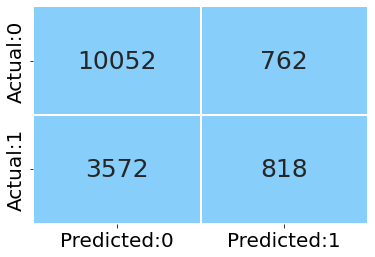

In [16]:
# call the function to plot the confusion matrix
# pass the gradient boosting model to the function
plot_confusion_matrix(gboost_model)

**Calculate performance measures on the test set.**

In [17]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
train_report = get_train_report(gboost_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     25362
           1       1.00      0.93      0.96     10113

    accuracy                           0.98     35475
   macro avg       0.99      0.97      0.98     35475
weighted avg       0.98      0.98      0.98     35475



In [18]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82     10814
           1       0.52      0.19      0.27      4390

    accuracy                           0.71     15204
   macro avg       0.63      0.56      0.55     15204
weighted avg       0.67      0.71      0.66     15204



**Interpretation:** The classification report shows that the model is 71% accurate. Also, the sensitivity and specificity are equal.

#### Plot the ROC curve.

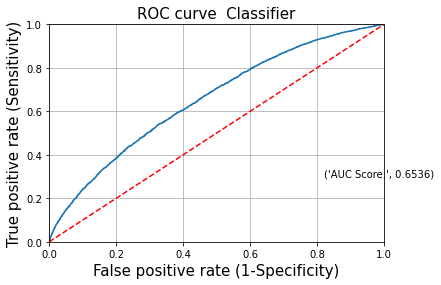

In [19]:
# call the function to plot the ROC curve
# pass the gradient boosting model to the function
plot_roc(gboost_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the gradient boosting model is away from the dotted line; with the AUC score 0.6554.

<a id="xgboost"></a>
## 3.3 XGBoost 

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

#### Build an XGBoost model on a training dataset.

In [20]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Let us understand the parameters in the `XGBClassifier()`:

`base_score=0.5`: Initial prediction for base learners.

`booster=gbtree`: Considers the regression tree as the base learners.

`colsample_bylevel=1`: Fraction of variables to consider for each level.

`colsample_bynode=1`: Fraction of variables to consider for each split.

`colsample_bytree=1`: Fraction of variables to consider for each tree.

`gamma=1`: Value of minimum loss reduction required for the partition of the leaf node.

`gpu_id=-1`: It considers all the GPU's. 

`importance_type=gain`: Importance type for calculating feature importance.

`interaction_constraints=''`: By default, no interaction between the features is allowed.

`learning_rate=0.300000012`: It considers the contribution of each estimator in the classifier.

`max_delta_step=0`: Maximum delta step allowed for each tree's weight estimation to be.

`max_depth=10`: Maximum depth of each tree.

`min_child_weight=1`: Minimum sum of hessian (p*(1-p)) required in a leaf node.

`missing=nan`: Value to consider as a missing value.

`monotone_constraints='()'`:  Constraint of variable monotonicity. (adding increasing/decreasing constraint on the variables )

`n_estimators=100`: The number of estimators to consider.

`n_jobs=0`: Number of parallel threads to run the classifier.

`num_parallel_tree=1`: It is used for boosting random forest.

`objective='binary:logistic'`: Considers the binary logistic regression as a learning objective.

`random_state=0`: It returns the same set of samples for each code implementation.

`reg_alpha=0`: Lasso regularization term for weights.

`reg_lambda=1`: Ridge regularization term for weights.

`scale_pos_weight=1`:  Ratio of the number of negative class to the positive class.

`subsample=1`: Fraction of total training data points.

`tree_method='exact'`: Considers the exact greedy algorithm.

`validate_parameters=1`: Performs validation on input paramerters.

`verbosity=None`: Enables verbose output (by default, no progress will be printed).

#### Plot the confusion matrix.

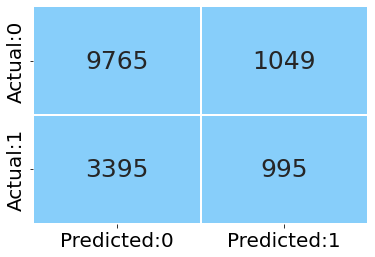

In [21]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

**Calculate performance measures on the test set.**

In [22]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the gradient boosting model to the function
train_report = get_train_report(xgb_model)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25362
           1       1.00      0.96      0.98     10113

    accuracy                           0.99     35475
   macro avg       0.99      0.98      0.98     35475
weighted avg       0.99      0.99      0.99     35475



In [23]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81     10814
           1       0.49      0.23      0.31      4390

    accuracy                           0.71     15204
   macro avg       0.61      0.56      0.56     15204
weighted avg       0.67      0.71      0.67     15204



In [24]:
xgb_model.score(X_train,y_train)

0.9869485553206483

#### Plot the ROC curve.

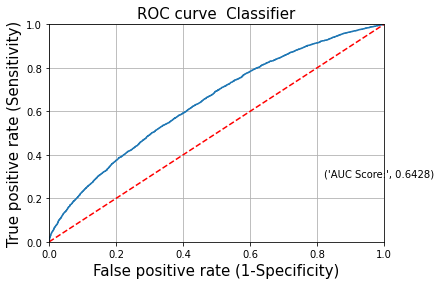

In [25]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the XGBoost model is away from the dotted line; with the AUC score 0.6461.

### Light Gradient Boosting Machine

In [26]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [27]:
from lightgbm import LGBMClassifier

In [28]:
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

In [29]:

lgb = LGBMClassifier(class_weight='balanced')
lgbm_model=lgb.fit(X_train, y_train)
 
# Predicting the Target variable
pred = lgbm_model.predict(X_test)
print(pred)
accuracy = lgbm_model.score(X_test, y_test)
print(accuracy)

[1 1 1 ... 0 1 0]
0.6235858984477769


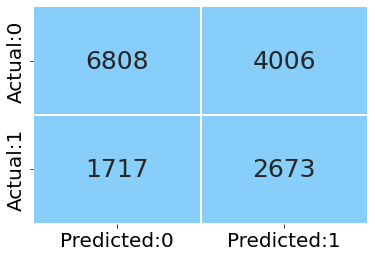

In [30]:
y_pred=lgbm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [31]:
lgbm_model.score(X_train,y_train)

0.7057928118393235

In [32]:
lgbm_model.score(X_test,y_test)

0.6235858984477769

<a id="tune"></a>
### 3.3.1 Tune the Hyperparameters (GridSearchCV)

Let us tune the hyperparameters to obtain the optimal values for the XGBoost model.

In [ ]:
%%time
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'min_child_weight':range(1,5),
                     
                     'gamma': [0, 1, 2, 3, 4],
                    'tree_method':['gpu_hist','hist'],
                     'subsample':[0.25,0.5,1],
                     'colsample_bytree':[0.25,0.5,1]
                    }


# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

#### Build the model using the tuned hyperparameters.

In [33]:
#learning_rate = xgb_grid.best_params_.get('learning_rate'),
                              # max_depth = xgb_grid.best_params_.get('max_depth'),
                              #gamma = xgb_grid.best_params_.get('gamma'),
                              #tree_method=xgb_grid.best_params_.get('tree_method'),
                              #subsample=xgb_grid.best_params_.get('subsample'),
                              #colsample_bytree=xgb_grid.best_params_.get('colsample_bytree')

# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model = XGBClassifier( colsample_bytree= 1, gamma= 1, learning_rate= 0.2, 
                                 max_depth=4, min_child_weight= 4, subsample= 1, tree_method= 'hist' )



# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83     10814
           1       0.59      0.13      0.22      4390

    accuracy                           0.72     15204
   macro avg       0.66      0.55      0.52     15204
weighted avg       0.69      0.72      0.65     15204



In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
scores=cross_val_score(xgb_model,X_train,y_train,scoring='recall')
np.mean(scores)

0.13141493986318561

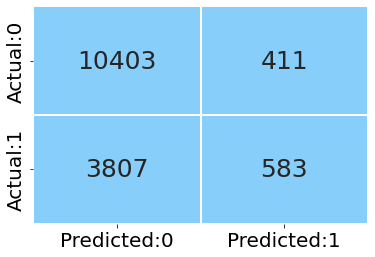

In [35]:
y_pred=xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [36]:
xgb_model.score(X_train,y_train)

0.750584918957012

In [37]:
xgb_model.score(X_test,y_test)

0.7225730071033939

### Identify the Important Features using XGBoost

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of the average gain across all the splits in which the feature is used to the total average gain of all the features.

There are different methods like `weight`, `cover`, `total_gain` and `total_cover` which returns the feature importance based on different criteria.

`weight`: It is the frequency of a feature used to split the data in all the trees.

`cover`: It is the average cover value of a feature for all the splits.

`total_gain`: It is the sum of gain of a feature for all the splits.

`total_cover`: It is the sum of a cover of a feature for all the splits.

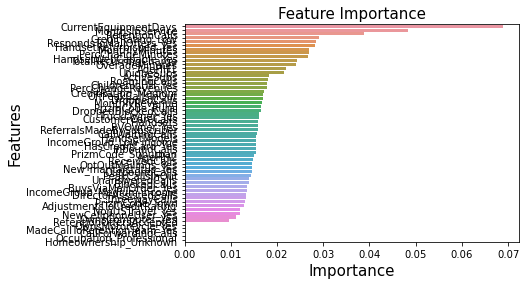

In [38]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

<a id="stack"></a>
# 4. Stack Generalization  

#### Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners (consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [39]:
%%time
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('xgb_model',XGBClassifier(colsample_bytree= 1, gamma= 1, learning_rate= 0.2, 
                                 max_depth=4, min_child_weight= 4, subsample= 1, tree_method= 'hist' )), 
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

CPU times: total: 1min 3s
Wall time: 42.5 s


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('xgb_model',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1,
                                              early_

#### Plot the confusion matrix.

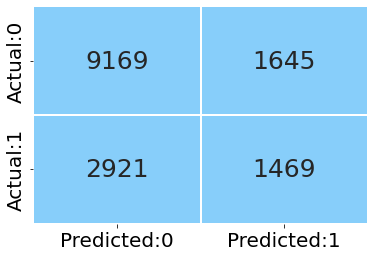

In [40]:
# call the function to plot the confusion matrix
# pass the stack model to the function
plot_confusion_matrix(stack_model)

**Calculate performance measures on the test set.**

In [41]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     10814
           1       0.47      0.33      0.39      4390

    accuracy                           0.70     15204
   macro avg       0.62      0.59      0.60     15204
weighted avg       0.68      0.70      0.68     15204



In [42]:
# train report
stack_model.score(X_train,y_train)

0.734291754756871

In [43]:
stack_model.score(X_test,y_test)

0.6996842936069455

#### Plot the ROC curve.

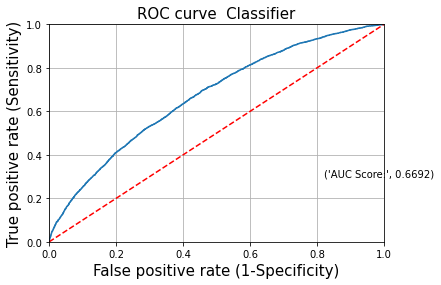

In [44]:
# call the function to plot the ROC curve
# pass the stack model to the function
plot_roc(stack_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.6621.

<a id="stack"></a>
# 4. Stack Generalization  2

#### Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners (consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [45]:
%%time
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion='gini', max_depth= 10, max_features= 'sqrt', 
                                                     max_leaf_nodes= 11, min_samples_leaf= 5, min_samples_split=2, n_estimators= 50)),
                 ('xgb_model',XGBClassifier(colsample_bytree= 1, gamma= 1, learning_rate= 0.2, max_depth= 4, 
                                            min_child_weight= 4, subsample= 1, tree_method= 'hist')), 
                 ('Gradient_model',GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 23, metric = 'manhattan')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

CPU times: total: 10min 50s
Wall time: 10min 31s


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=11,
                                                       min_samples_leaf=5,
                                                       n_estimators=50)),
                               ('xgb_model',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_me

#### Plot the confusion matrix.

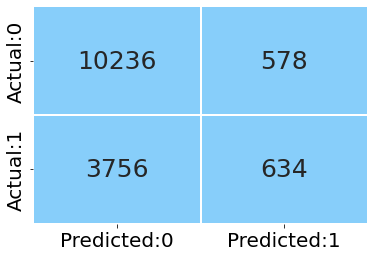

In [46]:
# call the function to plot the confusion matrix
# pass the stack model to the function
plot_confusion_matrix(stack_model)

**Calculate performance measures on the test set.**

In [47]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83     10814
           1       0.52      0.14      0.23      4390

    accuracy                           0.71     15204
   macro avg       0.63      0.55      0.53     15204
weighted avg       0.67      0.71      0.65     15204



In [49]:
stack_model.score(X_train,y_train)

0.7847780126849895

In [50]:
stack_model.score(X_test,y_test)

0.7149434359379111

#### Plot the ROC curve.

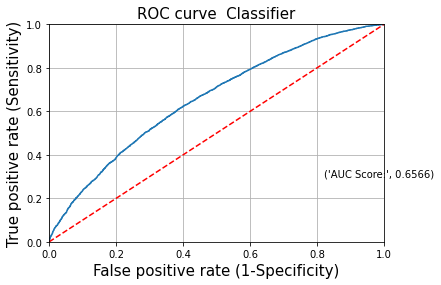

In [51]:
# call the function to plot the ROC curve
# pass the stack model to the function
plot_roc(stack_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.6568.

<a id="stack"></a>
# 4. Stack Generalization  3

#### Build the stacking classifier using the Random forest, KNN and Naive bayes as base learners (consider the hyperparameters tuned using GridSearchCV in the previous sessions).

In [52]:
%%time
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion='gini', max_depth= 10, max_features= 'sqrt', 
                                                     max_leaf_nodes= 11, min_samples_leaf= 5, min_samples_split=2, n_estimators= 50)),
                 ('xgb_model',XGBClassifier(colsample_bytree= 1, gamma= 1, learning_rate= 0.2, max_depth= 4, 
                                            min_child_weight= 4, subsample= 1, tree_method= 'hist')), 
                 ('Gradient_model',GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 23, metric = 'manhattan')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

CPU times: total: 10min 40s
Wall time: 10min 16s


StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=11,
                                                       min_samples_leaf=5,
                                                       n_estimators=50)),
                               ('xgb_model',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_me

#### Plot the confusion matrix.

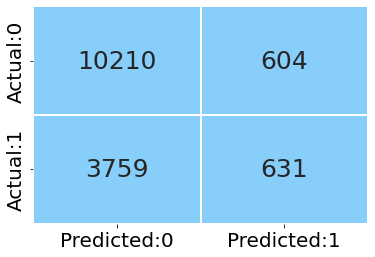

In [53]:
# call the function to plot the confusion matrix
# pass the stack model to the function
plot_confusion_matrix(stack_model)

**Calculate performance measures on the test set.**

In [54]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82     10814
           1       0.51      0.14      0.22      4390

    accuracy                           0.71     15204
   macro avg       0.62      0.54      0.52     15204
weighted avg       0.67      0.71      0.65     15204



In [55]:
stack_model.score(X_train,y_train)

0.7757575757575758

In [56]:
stack_model.score(X_test,y_test)

0.7130360431465403

#### Plot the ROC curve.

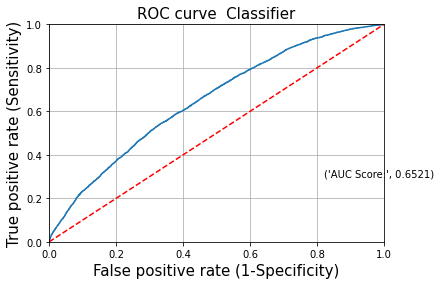

In [57]:
# call the function to plot the ROC curve
# pass the stack model to the function
plot_roc(stack_model)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that the stacking model is away from the dotted line; with the AUC score 0.6621.